In [140]:
import pandas as pd
import numpy as np
import json
import requests
import bs4
from urllib import request

## Piste review imdb : pb -> nbr limite de call journalier


In [16]:
import imdb

In [38]:
def get_media_review(id):

    url = f"https://imdb-api.com/en/API/MetacriticReviews/k_4i564ifi/tt{id}"

    payload = {}
    headers= {}
    response = requests.request("GET", url, headers=headers, data = payload)

    return json.loads(response.text)

In [39]:
def get_user_review(id):

    url = f"https://imdb-api.com/en/API/Reviews/k_4i564ifi/tt{id}"

    payload = {}
    headers= {}
    response = requests.request("GET", url, headers=headers, data = payload)

    return json.loads(response.text)

In [70]:
compteur = 0
dico = {}
for id in pd.DataFrame.from_dict(bechdel)['imdbid']:
    result = get_user_review(id)
    print(result)
    dico[id] = ' '.join([' '.join([dic['title'],dic['content']]) for dic in result['items']])
    compteur +=1
    if compteur%100 == 0:
        print(f'{compteur}/{len(pd.DataFrame.from_dict(bechdel)["imdbid"])}')


pd.DataFrame.from_dict(dico)

{'imDbId': None, 'title': None, 'fullTitle': None, 'type': None, 'year': None, 'items': None, 'errorMessage': 'Maximum usage (8684 of 100 per day)'}


TypeError: 'NoneType' object is not iterable

In [57]:
result = get_user_review(1375666)
for dic in result['items']:
    print(' '.join([dic['title'],dic['content']]))
    print('--------------------------------------')

A one-of-a-kind mind-blowing masterpiece! My 3rd time watching this movie! Yet, it still stunned my mind, kept me enjoyed its every moment and left me with many thoughts afterward.For someone like me, who've rarely slept without dream, it's so exciting watching how Christopher Nolan had illustrated every single characteristic of dream on the big screen. As it's been done so sophisticatedly, I do believe the rumour that Nolan had spent 10 years to finish the script of Inception. In my opinion, it's been so far the greatest achievement in his brilliant writer-director career. I jumped into this conclusion after making a quick benchmark of Nolan's remarkable works: Memento, as his first signature in the cinema history, is tremendous and has stayed the most mind-bending film I've ever seen. But overall, it doesn't reach the same level of Inception.The Prestige is highly impressive but somehow I haven't been able to find the very particular "Nolan's spirit" in it.The Batman Trilogy is the b

In [58]:
' '.join([' '.join([dic['title'],dic['content']]) for dic in result['items']])

'A one-of-a-kind mind-blowing masterpiece! My 3rd time watching this movie! Yet, it still stunned my mind, kept me enjoyed its every moment and left me with many thoughts afterward.For someone like me, who\'ve rarely slept without dream, it\'s so exciting watching how Christopher Nolan had illustrated every single characteristic of dream on the big screen. As it\'s been done so sophisticatedly, I do believe the rumour that Nolan had spent 10 years to finish the script of Inception. In my opinion, it\'s been so far the greatest achievement in his brilliant writer-director career. I jumped into this conclusion after making a quick benchmark of Nolan\'s remarkable works: Memento, as his first signature in the cinema history, is tremendous and has stayed the most mind-bending film I\'ve ever seen. But overall, it doesn\'t reach the same level of Inception.The Prestige is highly impressive but somehow I haven\'t been able to find the very particular "Nolan\'s spirit" in it.The Batman Trilog

In [77]:
tmdb = pd.DataFrame.from_dict(tmdb)

## Essai Analyse de sentiment

In [100]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')
from textblob import TextBlob
WNL = WordNetLemmatizer()

In [89]:
def text_cleaning(text):

    text = ' '.join(smallest_lemma(WNL.lemmatize(word.lower()),
                                   WNL.lemmatize(word.lower(),pos='v'))
                    for word in word_tokenize(str(text)) if word.isalpha())
    return text

def smallest_lemma(word1,word2):
    if len(word1) >= len(word2):
        return word2
    else:
        return word1

In [91]:
test_['clean_overview'] = test_['overview'].apply(text_cleaning)

C:\Users\marti\AppData\Local\Temp\ipykernel_19976\3916024562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_['clean_overview'] = test_['overview'].apply(text_cleaning)


In [97]:
#our polarity function
pol = lambda x: TextBlob(x).sentiment.polarity
#our subjectivity function
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [101]:
test_['polarity'] = test_['clean_overview'].apply(pol)
test_['subjectivity'] = test_['clean_overview'].apply(sub)

C:\Users\marti\AppData\Local\Temp\ipykernel_19976\2916440072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_['polarity'] = test_['clean_overview'].apply(pol)
C:\Users\marti\AppData\Local\Temp\ipykernel_19976\2916440072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_['subjectivity'] = test_['clean_overview'].apply(sub)


In [138]:
new = pd.merge(bechdel[['id','rating']],test_, on = 'id')
new

,id,rating,overview,clean_overview,polarity,subjectivity
0,9341,3,Geophysicist Dr. Josh Keyes discovers that an ...,geophysicist josh key discover that an unknown...,0.080000,0.653333
1,9486,3,"A lowly pencil pusher working for MI7, Johnny ...",a lowly pencil pusher work for johnny english ...,0.038542,0.305208
2,776,1,A weekend at a marquis’ country château lays b...,a weekend at a marquis country château lay bar...,-0.325000,0.550000
3,9292,1,"Eddie Hawkins, called Hudson Hawk has just bee...",eddie hawkins call hudson hawk ha just be rele...,0.000000,0.600000
4,153,1,"Two lost souls visiting Tokyo -- the young, ne...",two lose soul visit tokyo the young neglect wi...,0.024116,0.304167
...,...,...,...,...,...,...
1599,1715,3,"Homer is an orphan who was never adopted, beco...",homer be an orphan who be never adopt become t...,0.308333,0.450000
1600,1701,3,When the government puts all its rotten crimin...,when the government put all it rotten criminal...,-0.366667,0.583333
1601,570,3,Anaïs is twelve and bears the weight of the wo...,anaïs be twelve and bear the weight of the wor...,0.087500,0.563889
1602,9423,1,When the crew of an American tugboat boards an...,when the crew of an american tugboat board an ...,-0.112500,0.187500


In [129]:
import seaborn as sns

In [117]:
tmdb = json.load(open('tmdb_data.json'))
bechdel = json.load(open('bechdel_data.json'))

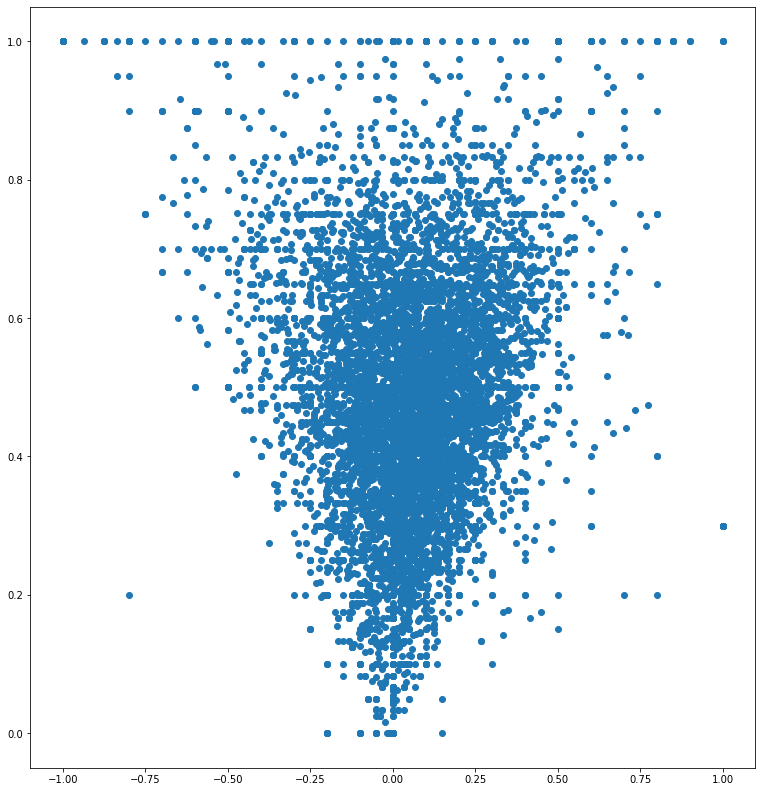

In [105]:
test_['id'] = test_['id'].apply(str)
bechdel['id'] = bechdel['id'].apply(str)

In [126]:
bechdel = json.load(open('bechdel_data.json'))
bechdel = pd.DataFrame.from_dict(bechdel)

,id,overview,clean_overview,polarity,subjectivity,year,title,imdbid,rating
0,315946,Photo sequence of the rare transit of Venus ov...,photo sequence of the rare transit of venus ov...,0.183333,0.444444,NaN,NaN,NaN,NaN
1,766094,Praxinoscope strip of a shifting rosette. Seri...,praxinoscope strip of a shift rosette series n...,0.000000,0.000000,NaN,NaN,NaN,NaN
2,194079,Sallie Gardner at a Gallop was one of the earl...,sallie gardner at a gallop be one of the earli...,0.000000,0.100000,NaN,NaN,NaN,NaN
3,751212,A pre-cinematograph colour animation of the mo...,a colour animation of the monkey play his violin,-0.050000,0.000000,NaN,NaN,NaN,NaN
4,502575,,,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9257,517088,Lucille Ball and Desi Arnaz face a crisis that...,lucille ball and desi arnaz face a crisis that...,0.000000,0.000000,NaN,NaN,NaN,NaN
9258,807196,A head chef balances multiple personal and pro...,a head chef balance multiple personal and prof...,0.175000,0.325000,NaN,NaN,NaN,NaN
9259,600583,A domineering but charismatic rancher wages a ...,a domineer but charismatic rancher wag a war o...,0.127273,0.570909,NaN,NaN,NaN,NaN
9260,423333,Two couples meet for a painful and raw convers...,two couple meet for a painful and raw conversa...,-0.576923,0.787179,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='polarity', ylabel='subjectivity'>

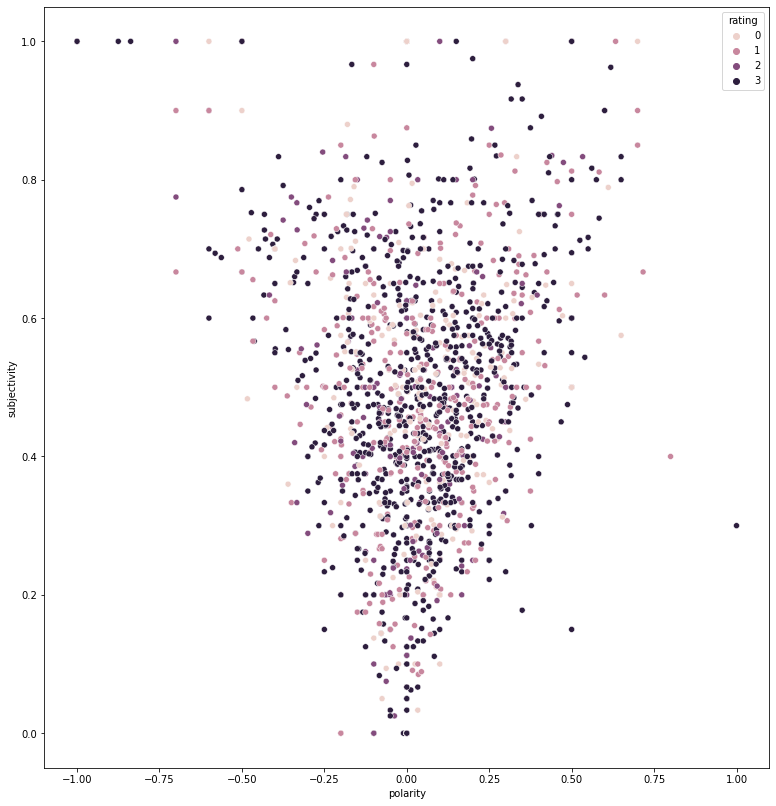

In [139]:
sns.scatterplot(x=new['polarity'],y=new['subjectivity'],hue=new['rating'])